In [1]:
import warnings
warnings.filterwarnings("ignore")

!pip install torch -q

import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

## En Pytorch vamos a usar Tensores
 - ### Tensor: Array multidimensional



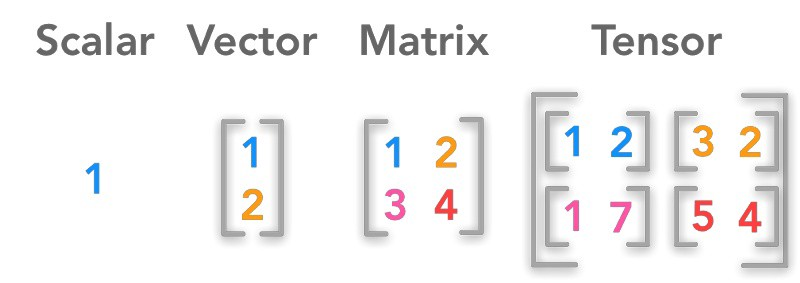

In [2]:
z = torch.zeros(5, 3)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


## Funciones de activación

 - ### Una función de activación decide si una neurona debe activarse o no. Decide si el input de la neurona es importante o no en el proceso de prediccón.


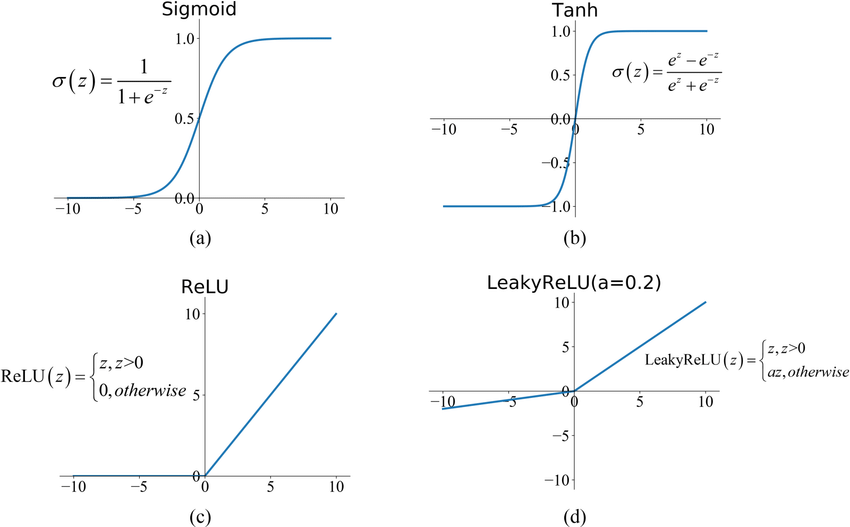

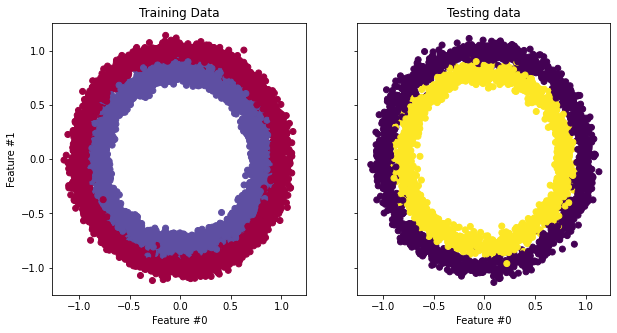

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# Create a dataset with 10,000 samples.
X, y = make_circles(n_samples = 10000,
                    noise= 0.05,
                    random_state=26)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=26)

# Visualize the data.
fig, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(10, 5))
train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral)
train_ax.set_title("Training Data")
train_ax.set_xlabel("Feature #0")
train_ax.set_ylabel("Feature #1")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
test_ax.set_title("Testing data")
plt.show()

In [4]:
# Convert data to torch tensors
class Data(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.astype(np.float32))
        self.y = torch.from_numpy(y.astype(np.float32))
        self.len = self.X.shape[0]
       
    def __getitem__(self, index):
        return self.X[index], self.y[index]
   
    def __len__(self):
        return self.len
   
batch_size = 64

In [5]:
# Instantiate training and test data
train_data = Data(X_train, y_train)
train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

test_data = Data(X_test, y_test)
test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

# Check it's working
for batch, (X, y) in enumerate(train_dataloader):
    print(f"Batch: {batch+1}")
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    break


Batch: 1
X shape: torch.Size([64, 2])
y shape: torch.Size([64])


In [6]:

input_dim = 2
hidden_dim = 10
output_dim = 1

class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralNetwork, self).__init__()
        self.input_layer = nn.Linear(in_features = 2, out_features = 10)
        self.hidden_1 = nn.Linear(in_features = 10, out_features = 10)
        self.output_layer = nn.Linear(in_features = 10, out_features = 1)
       
    def forward(self, x):
        x = F.relu(self.input_layer(x))
        x = F.sigmoid(self.output_layer(x))
        return x
       
model = NeuralNetwork(input_dim, hidden_dim, output_dim)
print(model)

NeuralNetwork(
  (input_layer): Linear(in_features=2, out_features=10, bias=True)
  (hidden_1): Linear(in_features=10, out_features=10, bias=True)
  (output_layer): Linear(in_features=10, out_features=1, bias=True)
)


In [7]:
learning_rate = 0.1
# Definimos nuestra función de pérdida (Binary cross entropy loss en este caso)
loss_fn = nn.BCELoss()
# El optimizador va a ser Descenso por gradiente estocástico
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [8]:
num_epochs = 100
loss_values = []

for epoch in range(num_epochs):
    for X, y in train_dataloader:
        # lleva los gradientes del optimizador a cero
        optimizer.zero_grad()
        # hace las predicciones pasando los datos por el modelo
        pred = model(X)
        # calcula la pérdida y los gradientes
        loss = loss_fn(pred, y.unsqueeze(-1))
        loss_values.append(loss.item())
        loss.backward()
        # ajusta los pesos aprendidos
        optimizer.step()

print("Training Complete")

Training Complete


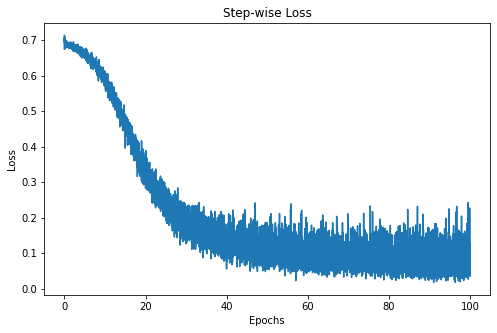

In [9]:
step = np.linspace(0, 100, 10500)

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(step, np.array(loss_values))
plt.title("Step-wise Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [16]:
import itertools

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import seaborn as sns

y_pred = []
y_test = []
total = 0
correct = 0

"""
We're not training so we don't need to calculate the gradients for our outputs
"""
with torch.no_grad():
    for X, y in test_dataloader:
        outputs = model(X)
        predicted = np.where(outputs < 0.5, 0, 1)
        predicted = list(itertools.chain(*predicted))
        y_pred.append(predicted)
        y_test.append(y)
        total += y.size(0)
        correct += (predicted == y.numpy()).sum().item()

print(f'Accuracy of the network on the 3300 test instances: {100 * correct // total}%')

Accuracy of the network on the 3300 test instances: 97%


In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import seaborn as sns


y_pred = list(itertools.chain(*y_pred))
y_test = list(itertools.chain(*y_test))


print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      1635
         1.0       0.98      0.98      0.98      1665

    accuracy                           0.98      3300
   macro avg       0.98      0.98      0.98      3300
weighted avg       0.98      0.98      0.98      3300



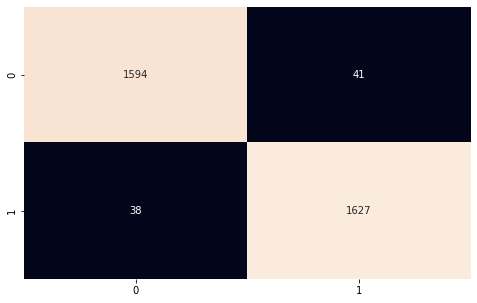

In [18]:
cf_matrix = confusion_matrix(y_test, y_pred)

plt.subplots(figsize=(8, 5))

sns.heatmap(cf_matrix, annot=True, cbar=False, fmt="g")

plt.show()

Fuentes

https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html

https://pytorch.org/tutorials/beginner/introyt/trainingyt.html

https://appsilon.com/pytorch-neural-network-tutorial/

https://www.datacamp.com/tutorial/pytorch-tutorial-building-a-simple-neural-network-from-scratch

https://medium.com/analytics-vidhya/a-simple-neural-network-classifier-using-pytorch-from-scratch-7ebb477422d2